

# Project: Investigate a Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected  The Movie Database dataset for analysis, this is a " community builty movie & tv database" and as I am a fan of movies and I believe that the dataset will provide for some very informative & entertaining analysis. 

I want to find out if the <strong>popularity</strong> of the movie is dependent on the budget of the movie. Are movies with higher budgets more popular than lower budget movies. 

My purpose with the investigation of this dataset is to explore the following questions regarding movies:

    1.Is the popularity of a movie dependent on the budget of the movie
    2.Which genre is more popular
    3.Investigate the revenue of movies according to popularity

The relevant data that I will use for this analysis will be the following variables:

    -popularity
    -revenue
    -genres
    -original_title
    -vote_average

My analysis will depend on scatter plots to see if there is a correlation between popularity and the other variables. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:

tm = pd.read_csv('tmdb-movies.csv')
tm.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
def pandas_config():
    # display 10 rows and all the columns
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', None)

    
pandas_config()

I want to check the dimensions of the dataset

In [3]:
tm.shape

(10866, 21)

I want to view the datatypes of the columns in my dataset

In [4]:
tm.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Check if there are any nul values in the dataset and form and opinion of their usefulnes in the analysis of the dataset

In [5]:
tm.isnull().sum().any()

True

In [6]:
tm.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some of the columns that have null values that I don't think will have an influence on the analysis of the data are:
id, imdb_id, homepage, tagline & keywords.  I think it is safe to drop these  columns as they will not serve any value for the analysis


In [7]:
tm = tm.drop(columns=['homepage', 'imdb_id', 'id'])


In [8]:
tm = tm.drop(columns=['tagline', 'keywords'])

Check the dimensions of the data to determine if the columns have indeed been removed

In [9]:
tm.shape

(10866, 16)

In [12]:
tm.head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


my data in the budget_adj and revenue_adj columns are showing in the scientific notation.  This will make it very hard to do any calculations and the columns are not providing useful information.  I will change the format to display as float instead of as scientific notation

In [13]:
pd.options.display.float_format = '{:.2f}'.format

check to determine if the data is the budget_adj and revenue_adj columns are now displaying correctly

In [14]:
tm.head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52


The date datatype is in a string format and I will change the datatype to datetime datatype to display better and then if needed calculations can be done

In [15]:


tm['release_date'] = pd.to_datetime(tm['release_date'])


Check the datatypes again to ensure that the datatype for the 'release_date' have been changed from object/string to datetime format

In [16]:
tm.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

display the data to check that the 'release_date' is displaying correctly

In [17]:
tm.head(1)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939.28,1392445892.52


Check the title column for any duplicate values

In [18]:
sum(tm.duplicated('original_title'))

295

remove all duplicate values from 'original_title' column

In [19]:
tm.drop_duplicates('original_title', inplace=True)

do a sum on the original title column to determine if duplicate values have been removed

In [20]:
sum(tm.duplicated('original_title'))

0

In [22]:
tm.shape

(10571, 16)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  Is the popularity of a movie dependent on the budget of the movie

Check general statistics of the dataset

I don't want to display data containing 0 values in the popularity or budget columns as this will skew the results.

In [43]:


tm = tm.loc[~(tm==0).all(axis=1)]

In [44]:
tm.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00,3756.00
mean,1.19,37528623.23,108238585.51,109.18,530.73,6.16,2001.54,44367028.74,136393060.04
std,1.49,42446014.12,177047807.46,19.88,885.74,0.79,11.06,44980074.99,215896926.49
min,0.00,1.00,2.00,15.00,10.00,2.20,1960.00,0.97,2.37
25%,0.46,10000000.00,13586680.25,95.00,71.00,5.68,1996.00,13191802.64,18309940.90
50%,0.80,24000000.00,44834485.00,105.00,205.00,6.20,2004.00,30148807.35,60925540.44
75%,1.37,50000000.00,125621665.00,119.00,581.25,6.70,2010.00,60613069.68,161943045.37
max,32.99,425000000.00,2781505847.00,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.41


create a scatter plot to see the correlation between the average vote for a movie and the budget of a movie

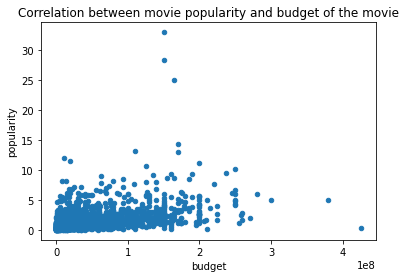

In [45]:
scatter = tm.plot(x='budget', y='popularity', kind='scatter');
plt.title('Correlation between movie popularity and budget of the movie')

scatter

create a plot to see the correlation between vote average and the movie budget and if it agrees with the popularity and budget 

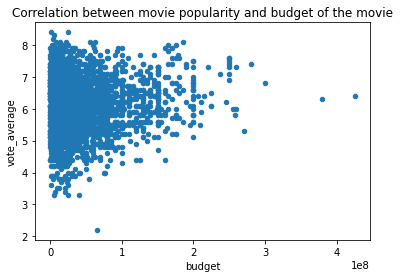

In [53]:
scatter = tm.plot(x='budget', y='vote_average', kind='scatter');
plt.title('Correlation between movie vote average and budget of the movie')

scatter

determine the mean of the popularity column for the movies

In [46]:
a =tm.popularity.mean()
a

1.1946882598509048

determine the mean of the budget column

In [59]:
b = tm.budget.mean()
b

37528623.23269436

group the data by their popularity and get mean of nbudget for each popularity group

In [74]:
tm.groupby('popularity').mean().budget

popularity
0.00       350000.00
0.01     30000000.00
0.02     15000000.00
0.02     15000000.00
0.02     35000000.00
            ...     
13.11   110000000.00
14.31   170000000.00
24.95   165000000.00
28.42   150000000.00
32.99   150000000.00
Name: budget, Length: 3754, dtype: float64

From the above it can be assumed that popular movies tend to have a much higher budget than movies with a lower budget.

view the movies with the highest popularity

In [60]:
top_movies = tm[['original_title','popularity','vote_average','budget']]

view the top 10 movies according to popularity 

In [61]:

top_movies.head(10)

,original_title,popularity,vote_average,budget
0,Jurassic World,32.99,6.50,150000000
1,Mad Max: Fury Road,28.42,7.10,150000000
2,Insurgent,13.11,6.30,110000000
3,Star Wars: The Force Awakens,11.17,7.50,200000000
4,Furious 7,9.34,7.30,190000000
5,The Revenant,9.11,7.20,135000000
6,Terminator Genisys,8.65,5.80,155000000
7,The Martian,7.67,7.60,108000000
8,Minions,7.40,6.50,74000000
9,Inside Out,6.33,8.00,175000000


view the bottom 10 movies 

In [49]:
top_movies.tail(10)

,original_title,popularity,vote_average,budget
10779,Convoy,0.41,6.20,12000000
10780,Invasion of the Body Snatchers,0.41,6.50,3500000
10788,The Wiz,0.28,6.10,24000000
10791,Damien: Omen II,0.24,6.10,6800000
10793,Watership Down,0.23,6.80,1000000
10822,Who's Afraid of Virginia Woolf?,0.67,7.50,7500000
10828,Torn Curtain,0.40,6.30,3000000
10829,El Dorado,0.40,6.90,4653000
10835,The Sand Pebbles,0.30,7.00,12000000
10848,Fantastic Voyage,0.21,6.70,5115000


create a histogram of the top movies in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015D4D4F7C70>,
      dtype=object)

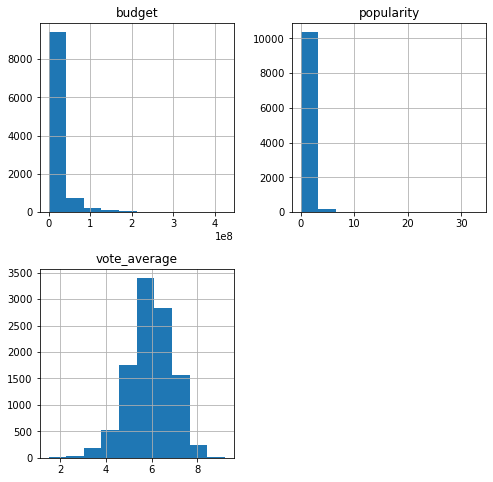

In [36]:
top_movies.hist(figsize=(8,8))


### Research Question 2:  which genre is more popular 

create a new dataframe with only certain columns assigned to the dataset

In [76]:
top_genres = tm[['original_title','popularity','vote_average','budget', 'genres']]

view the dataset and make sure it is displaying correctly

In [77]:
top_genres.head()

,original_title,popularity,vote_average,budget,genres
0,Jurassic World,32.99,6.50,150000000,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,28.42,7.10,150000000,Action|Adventure|Science Fiction|Thriller
2,Insurgent,13.11,6.30,110000000,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,11.17,7.50,200000000,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,9.34,7.30,190000000,Action|Crime|Thriller


group the data by genres and get the mean according to their popularity

In [78]:
top_genres.groupby('genres').mean().popularity

genres
Action                                              1.05
Action|Adventure                                    1.18
Action|Adventure|Animation|Family|Fantasy           1.07
Action|Adventure|Animation|Family|Science Fiction   3.34
Action|Adventure|Animation|Science Fiction          0.48
                                                    ... 
Western|Drama                                       0.67
Western|Drama|Adventure|Thriller                    9.11
Western|History                                     0.13
Western|History|War                                 0.95
Western|Thriller                                    0.39
Name: popularity, Length: 1033, dtype: float64

the above data is not useful as it contains multiple keywords

to get useful information with regards to the genre column we will have to split the data into multiple cells

create a copy of the dataset for each genre

In [81]:
action = top_genres.copy()



In [43]:
action.head()

,original_title,popularity,vote_average,budget,genres
0,Jurassic World,32.99,6.50,150000000,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,28.42,7.10,150000000,Action|Adventure|Science Fiction|Thriller
2,Insurgent,13.11,6.30,110000000,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,11.17,7.50,200000000,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,9.34,7.30,190000000,Action|Crime|Thriller


split the dataframe genres columns to display only the first genre keyword for each movie.  

In [84]:
split_columns = ['genres']
for c in split_columns:
    action[c] = action[c].apply(lambda x: x.split("|")[0])

In [86]:
action

,original_title,popularity,vote_average,budget,genres
0,Jurassic World,32.99,6.50,150000000,Action
1,Mad Max: Fury Road,28.42,7.10,150000000,Action
2,Insurgent,13.11,6.30,110000000,Adventure
3,Star Wars: The Force Awakens,11.17,7.50,200000000,Action
4,Furious 7,9.34,7.30,190000000,Action
...,...,...,...,...,...
10822,Who's Afraid of Virginia Woolf?,0.67,7.50,7500000,Drama
10828,Torn Curtain,0.40,6.30,3000000,Mystery
10829,El Dorado,0.40,6.90,4653000,Action
10835,The Sand Pebbles,0.30,7.00,12000000,Action


get a list of the top 10 movies according to popularity and their genres

In [90]:
action.head(10)

,original_title,popularity,vote_average,budget,genres
0,Jurassic World,32.99,6.50,150000000,Action
1,Mad Max: Fury Road,28.42,7.10,150000000,Action
2,Insurgent,13.11,6.30,110000000,Adventure
3,Star Wars: The Force Awakens,11.17,7.50,200000000,Action
4,Furious 7,9.34,7.30,190000000,Action
5,The Revenant,9.11,7.20,135000000,Western
6,Terminator Genisys,8.65,5.80,155000000,Science Fiction
7,The Martian,7.67,7.60,108000000,Drama
8,Minions,7.40,6.50,74000000,Family
9,Inside Out,6.33,8.00,175000000,Comedy


create a bar chart to view a comparisson of movie genres in the dataset

Text(0, 0.5, 'Number of movies in dataset')

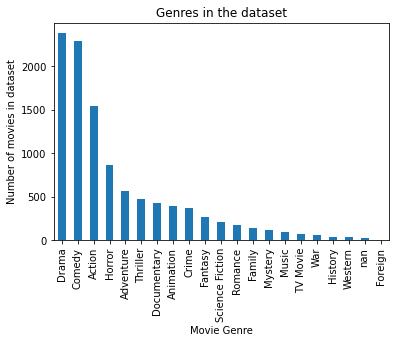

In [79]:
action['genres'].value_counts().plot(kind='bar');
plt.title('Genres in the dataset')
plt.xlabel('Movie Genre');
plt.ylabel('Number of movies in dataset')

drop any columns in the dataset containg nul values

In [87]:
action.dropna(inplace=True)

get a list of all field values in the genres 

In [87]:
action['genres'].value_counts()

Drama              868
Comedy             778
Action             672
Adventure          304
Horror             252
Crime              167
Thriller           159
Fantasy            109
Animation           99
Science Fiction     95
Romance             63
Family              39
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

I want to plot the correlation between the popularity of a movie and the genre of the movie to determine which movie genre is more popular

Text(0.5, 1.0, 'Correlation between movie genre and popularity')

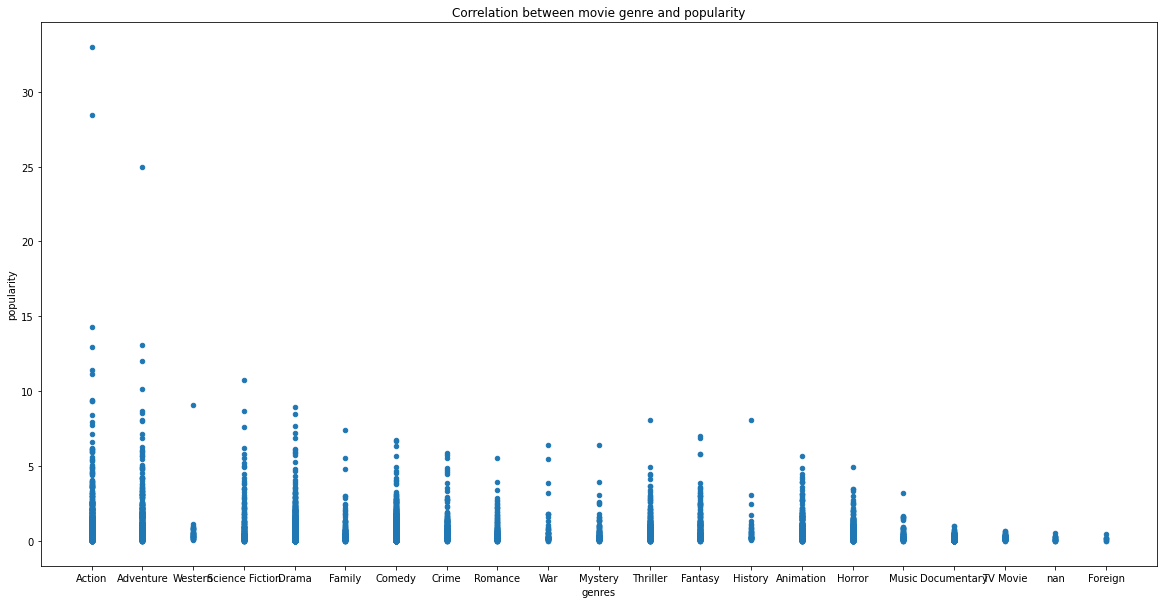

In [90]:
movie_plot = action.plot(x='genres', y='popularity', kind='scatter', figsize=(20,10));
plt.title('Correlation between movie genre and popularity')


the above scatter plot seems to indicate that movies in the action and adventure genre is more popular with viewers than those of other genres.

### Research Question 3:  Investigate the revenue of movies according to popularity

In [122]:
revenue = tm[['original_title','popularity','vote_average','budget', 'revenue']]
revenue.head()

,original_title,popularity,vote_average,budget,revenue
0,Jurassic World,32.99,6.50,150000000,1513528810
1,Mad Max: Fury Road,28.42,7.10,150000000,378436354
2,Insurgent,13.11,6.30,110000000,295238201
3,Star Wars: The Force Awakens,11.17,7.50,200000000,2068178225
4,Furious 7,9.34,7.30,190000000,1506249360


view the top 10 movies according to revenue generated

In [123]:
top_revenue = revenue.sort_values('revenue', ascending=False)
top_revenue.head(10)

,original_title,popularity,vote_average,budget,revenue
1386,Avatar,9.43,7.10,237000000,2781505847
3,Star Wars: The Force Awakens,11.17,7.50,200000000,2068178225
5231,Titanic,4.36,7.30,200000000,1845034188
4361,The Avengers,7.64,7.30,220000000,1519557910
0,Jurassic World,32.99,6.50,150000000,1513528810
4,Furious 7,9.34,7.30,190000000,1506249360
14,Avengers: Age of Ultron,5.94,7.40,280000000,1405035767
3374,Harry Potter and the Deathly Hallows: Part 2,5.71,7.70,125000000,1327817822
5425,Iron Man 3,4.95,6.90,200000000,1215439994
8,Minions,7.40,6.50,74000000,1156730962


group movies according to revenue generated and popularity rating

In [124]:
top_revenue.groupby('revenue').mean().popularity

revenue
2             0.51
3             0.35
5             0.39
6             0.32
11            0.26
              ... 
1513528810   32.99
1519557910    7.64
1845034188    4.36
2068178225   11.17
2781505847    9.43
Name: popularity, Length: 3663, dtype: float64

create a scatter plot to compare the correlation between revenue and movie popularity

Text(0.5, 1.0, 'Correlation between movie genre and popularity')

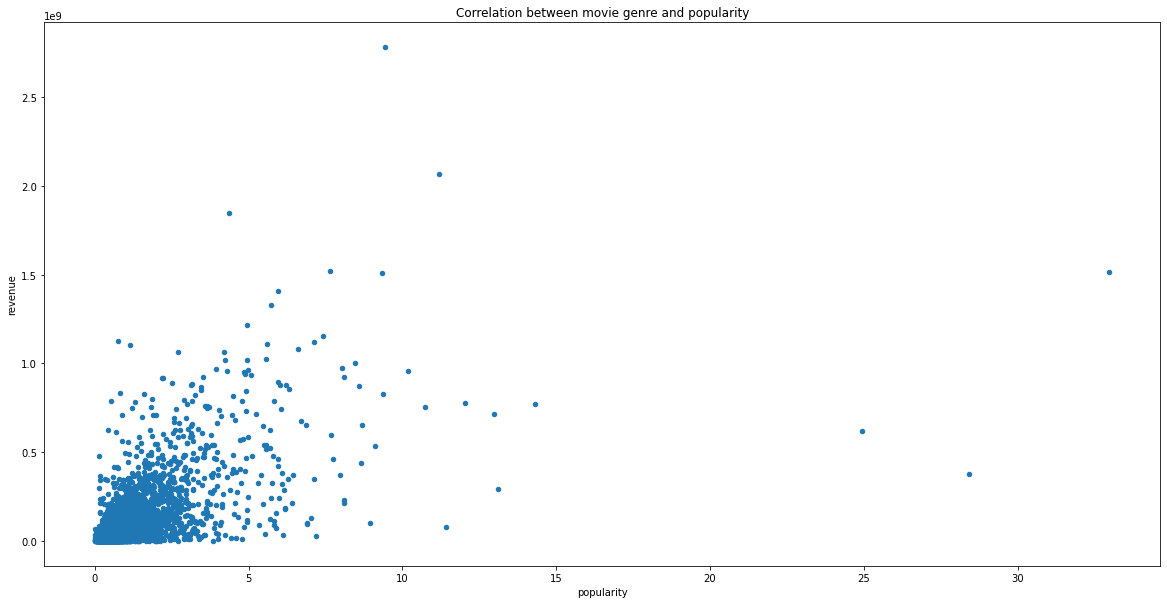

In [125]:
top_revenue = top_revenue.plot(x='popularity', y='revenue', kind='scatter', figsize=(20,10));
plt.title('Correlation between movie revenue and popularity')

<a id='conclusions'></a>
## Conclusions

#### conclusion with regards to question 1
Movies with a higher budget does seem to have a higher popularity with viewers.  looking at the top 10 movies in the dataset with regards to popularity they all have a very high budget compared to the bottom 10 movies and their budget.

#### conclusion with regards to question 2

it seems that the Action genre is the more popular movie genre in the dataset based on the comparrison between the genres and their respective popularity in the scatter plot.  Out of the top 10 movies in the dataset is the top genre also the action genre

#### conclusion with regards to question 3

I thought that the more popular a movie with the audience the higher the revenue would be but this is not the case.  from the data popularity is not the only factor that contributes to revenue of a movie. 

#### Limitations
I have used and worked with TMDB Movies dataset for the analysis and the analysis only pertains to the popularity, revenue, genre variables.  I had to drop some data in the dataset containing nul values and also the original_title column contained quite a few duplicates that had to be removed.

I had to ommit some movies from the analysis as they contained 0 values in 1 or more columns in the dataset that would uneccasarily skew the data.  

In the second section where I analysed the genres of the movies I split the data in the genre column to only display the first keyword of each genre as I think the first genre keyword indicates the main genre.  However, some genres for example were Adeventure and then action.

